In [1]:
%matplotlib widget
from Pyriod import Pyriod

/Users/ccra8514/anaconda3/envs/notebook_pyriod/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/ccra8514/.lightkurve/cache. Please move all the files in the legacy directory /Users/ccra8514/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


### runs in notebook_pyriod
However, there are errors, which I can't tell if are from pyriod or from version discrepancies

In [2]:
import lightkurve as lk
import numpy as np
import astropy.units as u
# lc = lk.search_lightcurve('TIC 257459955',mission='TESS',sector=3)[0].download().remove_nans().flatten(2161).remove_outliers(5)


In [3]:
eroscg2 = np.loadtxt('../data/olddata/pydia.KMTNJ175248.7-284518.AI.txt')

In [4]:
eroscg2 = eroscg2[eroscg2[:,0].argsort()]
# eroscg2 = eroscg2[(eroscg2[...,1:] != eroscg2[...,:-1]).all(-1)]
# eroscg2[20:30,:]

In [5]:
## make a mask to remove duplicates?
dup_mask = [0]
for i in range(1,len(eroscg2)):
    diff = eroscg2[i,0]-eroscg2[i-1,0]
    if diff != 0.0:
        dup_mask.append(i)
# print(dup_mask)

In [6]:
eroscg2 = eroscg2[dup_mask]

In [7]:
lc = lk.LightCurve(time=eroscg2[:,0][eroscg2[:,0]<8500],
                   flux=eroscg2[:,1][eroscg2[:,0]<8500]*u.mag,
                   flux_err=eroscg2[:,2][eroscg2[:,0]<8500]*u.mag)

In [9]:
%matplotlib inline

<Axes: xlabel='Time [JD]', ylabel='Flux [$\\mathrm{mag}$]'>

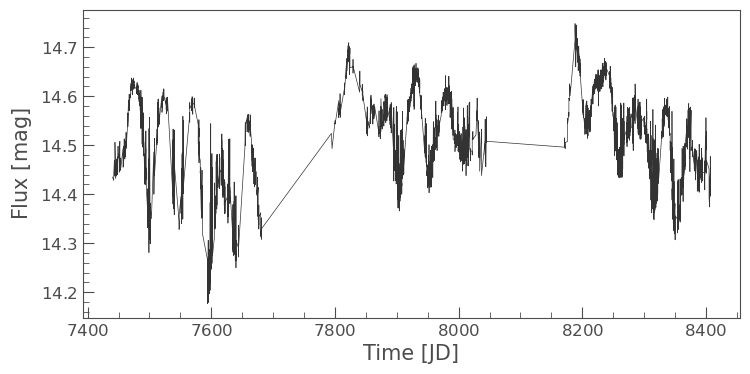

In [11]:
lc.plot()

AttributeError: module 'astropy.timeseries.periodograms.lombscargle_multiband.implementations.main' has no attribute '_is_regular'

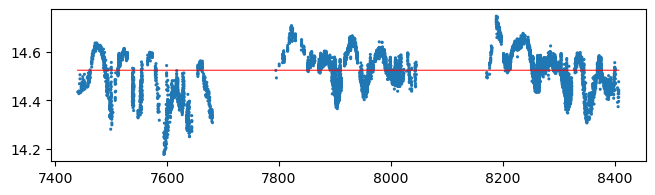

In [12]:
pyriod = Pyriod(lc)

In [13]:
pyriod.TimeSeries()

NameError: name 'pyriod' is not defined

In [23]:
pyriod.Periodogram()

In [24]:
pyriod.Signals()

In [25]:
pyriod.Log()

In [18]:
## I have no idea why this one doesn't work but that's okay I suppose
# pyriod.Pyriod()